

# Best Track Data (HURDAT2)

Atlantic hurricane database (HURDAT2) 1851-2018 (5.9MB download)
This dataset was provided on 10 May 2019 to include the 2018 update to the best tracks.

This dataset (known as Atlantic HURDAT2) has a comma-delimited, text format with six-hourly information on the location, maximum winds, central pressure, and (beginning in 2004) size of all known tropical cyclones and subtropical cyclones. The original HURDAT database has been retired.

Detailed information regarding the Atlantic Hurricane Database Re-analysis Project is available from the Hurricane Research Division.

ref:https://www.nhc.noaa.gov/data/

#https://www.nhc.noaa.gov/data/hurdat/hurdat2-format-atlantic.pdf
# HURDAT2 Processor

This is a python script that convert your HURDAT to a dataframe and generate a CSV file for you to eaily process this data. This work is part of trajectory segmentation research[1]. We use this dataset for evaluation purposes. If you are going to apply this script please cite to our work.
Thanks.
[1]: Etemad, Mohammad, et al. "A Trajectory Segmentation Algorithm Based on Interpolation-based Change Detection Strategies." EDBT/ICDT Workshops. 2019.

In [53]:
import pandas as pd
from datetime import datetime, date, time
Record_identifier_dic={'C':"Closest approach to a coast, not followed by a landfall"
,'G':"Genesis"
,'I':"An intensity peak in terms of both pressure and wind"
,'L':"Landfall (center of system crossing a coastline)"
,'P':"Minimum in central pressure"
,'R':"Provides additional detail on the intensity of the cyclone when rapid changes are underway"
,'S':"Change of status of the system"
,'T':"Provides additional detail on the track (position) of the cyclone"
,'W':"Maximum sustained wind speed"}
Status_of_system_dic={
'TD':"Tropical cyclone of tropical depression intensity (< 34 knots)"
,'TS':"Tropical cyclone of tropical storm intensity (34-63 knots)"
,'HU':"Tropical cyclone of hurricane intensity (> 64 knots)"
,'EX':"Extratropical cyclone (of any intensity)"
,'SD':"Subtropical cyclone of subtropical depression intensity (< 34 knots)"
,'SS':"Subtropical cyclone of subtropical storm intensity (> 34 knots)"
,'LO':"A low that is neither a tropical cyclone, a subtropical cyclone, nor an extratropical cyclone (of any intensity)"
,'WV':"Tropical Wave (of any intensity)"
,'DB':"Disturbance (of any intensity)"} 
    
def process_details(data):
    data=data.split(',')

    Year=int(data[0][0:4])
    Month=int(data[0][4:6])
    Day=int(data[0][6:8])
    Hours_in_UTC=int(data[1].strip()[0:2])
    Minutes_in_UTC=int(data[1].strip()[2:4])
    date_time=datetime.combine(date(Year,Month,Day),time(Hours_in_UTC, Minutes_in_UTC))
    Record_identifier=data[2].strip()
    try:
        Record_identifier_desc=Record_identifier_dic[data[2].strip()]
    except:
        Record_identifier_desc=None
        
    Status_of_system=data[3].strip()
    try:
        Status_of_system_desc=Status_of_system_dic[Status_of_system]
    except:
        Status_of_system_desc=None
        
    if data[4].strip()[-1:] in ('N','S'):
        if data[4].strip()[-1:]=='N':
            Latitude=float(data[4].strip()[:-1])
        else:
            Latitude=-1.0*float(data[4].strip()[:-1])
    else:
        Latitude=-999
    
    if data[5].strip()[-1:] in ('E','W'):
        if data[5].strip()[-1:]=='E':
            Longitude=float(data[5].strip()[:-1])
        else:
            Longitude=-1.0*float(data[5].strip()[:-1])
    else:
        Longitude=-999
    Maximum_sustained_wind_in_knots=float(data[6].strip())
    Minimum_Pressure_in_millibars=float(data[7].strip())
    i=8
    F34_kt_wind_radii_maximum_northeastern=float(data[i].strip())
    i+=1
    F34_kt_wind_radii_maximum_southeastern=float(data[i].strip())
    i+=1
    F34_kt_wind_radii_maximum_southwestern=float(data[i].strip())
    i+=1
    F34_kt_wind_radii_maximum_northwestern=float(data[i].strip())
    

    i+=1
    F50_kt_wind_radii_maximum_northeastern=float(data[i].strip())
    i+=1
    F50_kt_wind_radii_maximum_southeastern=float(data[i].strip())
    i+=1
    F50_kt_wind_radii_maximum_southwestern=float(data[i].strip())
    i+=1
    F50_kt_wind_radii_maximum_northwestern=float(data[i].strip())
    
    i+=1
    F64_kt_wind_radii_maximum_northeastern=float(data[i].strip())
    i+=1
    F64_kt_wind_radii_maximum_southeastern=float(data[i].strip())
    i+=1
    F64_kt_wind_radii_maximum_southwestern=float(data[i].strip())
    i+=1
    F64_kt_wind_radii_maximum_northwestern=float(data[i].strip())


    
    res=date_time,Year,Month,Day,Hours_in_UTC,Minutes_in_UTC,Record_identifier,Record_identifier_desc,Status_of_system,Status_of_system_desc,Latitude,Longitude,Maximum_sustained_wind_in_knots,Minimum_Pressure_in_millibars,F34_kt_wind_radii_maximum_northeastern,F34_kt_wind_radii_maximum_southeastern,F34_kt_wind_radii_maximum_southwestern,F34_kt_wind_radii_maximum_northwestern,F50_kt_wind_radii_maximum_northeastern,F50_kt_wind_radii_maximum_southeastern,F50_kt_wind_radii_maximum_southwestern,F50_kt_wind_radii_maximum_northwestern,F64_kt_wind_radii_maximum_northeastern,F64_kt_wind_radii_maximum_southeastern,F64_kt_wind_radii_maximum_southwestern,F64_kt_wind_radii_maximum_northwestern
    return res

def process_header(data):
    data=data.split(',')
    Basin,ATCF_cyclone_number_for_that_year,Year,Name,Number_of_best_track_entries=data[0][0:2],data[0][2:4],data[0][4:8],data[1].strip(),data[2].strip()
    res=Basin,ATCF_cyclone_number_for_that_year,Year,Name,Number_of_best_track_entries
    return res


def identify_line_type(data):
    print(data.split(','))
    if len(data.split(','))>4:
        return 2
    else:
        return 1
def columns_name():
    res=['Basin','ATCF_cyclone_number_for_that_year','Year_','Name',
         #'Number_of_best_track_entries',
         'date_time','Year','Month','Day','Hours_in_UTC','Minutes_in_UTC',
         'Record_identifier','Record_identifier_desc','Status_of_system','Status_of_system_desc','Latitude','Longitude'
         ,'Maximum_sustained_wind_in_knots','Minimum_Pressure_in_millibars','F34_kt_wind_radii_maximum_northeastern',
         'F34_kt_wind_radii_maximum_southeastern','F34_kt_wind_radii_maximum_southwestern',
         'F34_kt_wind_radii_maximum_northwestern','F50_kt_wind_radii_maximum_northeastern',
         'F50_kt_wind_radii_maximum_southeastern','F50_kt_wind_radii_maximum_southwestern',
         'F50_kt_wind_radii_maximum_northwestern','F64_kt_wind_radii_maximum_northeastern',
         'F64_kt_wind_radii_maximum_southeastern','F64_kt_wind_radii_maximum_southwestern',
         'F64_kt_wind_radii_maximum_northwestern']
    return res


In [54]:

pf=[]
header_fields=[]
filepath = 'hurdat2-1851-2018-051019.txt'
with open(filepath) as fp:
    ln = fp.readline()
    while ln:
        
        lt=identify_line_type(ln)

        details=[]
        if (lt==1):
            header_fields=process_header(ln)
            details=[]
        else:
            details=process_details(ln)
        if (details!=[]):
            n=list(header_fields[:-1])+list(details)

            pf.append(n)
        ln=fp.readline()
        
df=pd.DataFrame(pf)
df.columns=columns_name()
df.to_csv('hur.csv')
print(df.shape)

['AL011851', '            UNNAMED', '     14', '\n']
['18510625', ' 0000', '  ', ' HU', ' 28.0N', '  94.8W', '  80', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['18510625', ' 0600', '  ', ' HU', ' 28.0N', '  95.4W', '  80', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['18510625', ' 1200', '  ', ' HU', ' 28.0N', '  96.0W', '  80', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['18510625', ' 1800', '  ', ' HU', ' 28.1N', '  96.5W', '  80', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['18510625', ' 2100', ' L', ' HU', ' 28.2N', '  96.8W', '  80', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['18510626',

['18720913', ' 0000', '  ', ' HU', ' 24.7N', '  63.5W', '  70', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['18720913', ' 0600', '  ', ' HU', ' 25.4N', '  63.3W', '  70', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['18720913', ' 1200', '  ', ' HU', ' 26.1N', '  63.2W', '  70', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['18720913', ' 1800', '  ', ' HU', ' 26.8N', '  63.1W', '  70', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['18720914', ' 0000', '  ', ' HU', ' 27.4N', '  63.0W', '  70', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['18720914', ' 0600', '  ', ' HU', ' 28.1N', '  62.8W', '  70', '

['18840910', ' 1800', '  ', ' HU', ' 27.8N', '  53.5W', '  90', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['18840911', ' 0000', '  ', ' HU', ' 28.0N', '  53.6W', '  90', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['18840911', ' 0600', '  ', ' HU', ' 28.2N', '  53.6W', '  90', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['18840911', ' 1200', '  ', ' HU', ' 28.5N', '  53.7W', '  90', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['18840911', ' 1800', '  ', ' HU', ' 28.7N', '  53.7W', '  90', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['18840912', ' 0000', '  ', ' HU', ' 29.0N', '  53.6W', '  80', '

['18921017', ' 0600', '  ', ' TS', ' 35.0N', '  57.2W', '  50', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['18921017', ' 1200', '  ', ' TS', ' 35.5N', '  56.0W', '  50', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['18921017', ' 1800', '  ', ' TS', ' 36.2N', '  54.6W', '  50', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['18921018', ' 0000', '  ', ' EX', ' 37.0N', '  53.1W', '  50', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['18921018', ' 0600', '  ', ' EX', ' 37.8N', '  51.8W', '  50', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['18921018', ' 1200', '  ', ' EX', ' 38.8N', '  50.2W', '  50', '

['19000908', ' 1800', '  ', ' TS', ' 10.3N', '  19.4W', '  45', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19000909', ' 0000', '  ', ' TS', ' 10.6N', '  20.3W', '  50', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19000909', ' 0600', '  ', ' TS', ' 10.9N', '  21.2W', '  55', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19000909', ' 1200', '  ', ' TS', ' 11.2N', '  22.1W', '  60', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19000909', ' 1800', '  ', ' HU', ' 11.6N', '  23.0W', '  65', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19000910', ' 0000', '  ', ' HU', ' 12.0N', '  23.9W', '  70', '

['AL091909', '            UNNAMED', '     35', '\n']
['19090913', ' 1200', '  ', ' TD', ' 17.5N', '  71.0W', '  30', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19090913', ' 1800', '  ', ' TD', ' 17.8N', '  72.5W', '  30', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19090914', ' 0000', '  ', ' TD', ' 18.1N', '  73.9W', '  30', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19090914', ' 0600', '  ', ' TD', ' 18.3N', '  75.2W', '  30', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19090914', ' 1200', '  ', ' TD', ' 18.5N', '  76.5W', '  30', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19090914',

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




['AL091992', '               EARL', '     29', '\n']
['19920926', ' 1800', '  ', ' TD', ' 26.2N', '  69.1W', '  25', ' 1009', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19920927', ' 0000', '  ', ' TD', ' 25.8N', '  70.8W', '  25', ' 1008', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19920927', ' 0600', '  ', ' TD', ' 26.3N', '  72.3W', '  25', ' 1007', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19920927', ' 1200', '  ', ' TD', ' 27.0N', '  73.9W', '  30', ' 1006', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19920927', ' 1800', '  ', ' TD', ' 27.7N', '  75.5W', '  30', ' 1003', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19920928'

['19980926', ' 0000', '  ', ' HU', ' 30.5N', '  51.8W', '  75', '  981', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19980926', ' 0600', '  ', ' HU', ' 31.1N', '  51.0W', '  75', '  979', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19980926', ' 1200', '  ', ' HU', ' 31.8N', '  49.9W', '  75', '  977', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19980926', ' 1800', '  ', ' HU', ' 32.6N', '  48.8W', '  80', '  973', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19980927', ' 0000', '  ', ' HU', ' 33.9N', '  47.3W', '  90', '  970', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['19980927', ' 0600', '  ', ' HU', ' 35.5N', '  45.2W', '  90', '

['20031004', ' 0600', '  ', ' TS', ' 19.5N', '  94.0W', '  50', '  994', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['20031004', ' 1200', '  ', ' TS', ' 19.3N', '  93.8W', '  50', '  994', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['20031004', ' 1800', '  ', ' TS', ' 18.8N', '  93.8W', '  50', '  996', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['20031005', ' 0000', '  ', ' TS', ' 18.6N', '  93.6W', '  50', '  996', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['20031005', ' 0600', '  ', ' TS', ' 18.5N', '  93.5W', '  50', '  996', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', ' -999', '\n']
['20031005', ' 1000', ' L', ' TS', ' 18.4N', '  93.5W', '  50', '

['20071027', ' 1200', '  ', ' LO', ' 15.3N', '  70.1W', '  25', ' 1004', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '\n']
['20071027', ' 1800', '  ', ' LO', ' 15.4N', '  71.0W', '  25', ' 1004', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '\n']
['20071028', ' 0000', '  ', ' TD', ' 15.7N', '  71.2W', '  30', ' 1003', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '\n']
['20071028', ' 0600', '  ', ' TD', ' 16.0N', '  71.4W', '  30', ' 1002', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '\n']
['20071028', ' 1200', '  ', ' TS', ' 16.3N', '  71.6W', '  40', '  999', '  100', '    0', '    0', '   75', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '\n']
['20071028', ' 1800', '  ', ' TS', ' 16.6N', '  71.8W', '  50', '

['20100908', ' 0600', '  ', ' TD', ' 31.6N', '  99.5W', '  25', ' 1004', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '\n']
['20100908', ' 1200', '  ', ' TD', ' 32.7N', '  99.5W', '  20', ' 1005', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '\n']
['20100908', ' 1800', '  ', ' TD', ' 33.7N', '  98.7W', '  20', ' 1005', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '\n']
['20100909', ' 0000', '  ', ' TD', ' 34.7N', '  97.9W', '  20', ' 1005', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '\n']
['20100909', ' 0600', '  ', ' TD', ' 35.5N', '  97.2W', '  20', ' 1005', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '\n']
['20100909', ' 1200', '  ', ' TD', ' 36.3N', '  96.4W', '  20', '

['20150826', ' 0600', '  ', ' TS', ' 15.9N', '  55.2W', '  35', ' 1005', '   90', '   70', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '\n']
['20150826', ' 1200', '  ', ' TS', ' 16.2N', '  56.8W', '  40', ' 1005', '   90', '   90', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '\n']
['20150826', ' 1800', '  ', ' TS', ' 16.4N', '  58.2W', '  40', ' 1005', '   90', '   90', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '\n']
['20150827', ' 0000', '  ', ' TS', ' 16.6N', '  59.5W', '  40', ' 1006', '   90', '   90', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '\n']
['20150827', ' 0600', '  ', ' TS', ' 16.5N', '  60.8W', '  45', ' 1001', '  100', '  100', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '    0', '\n']
['20150827', ' 1200', '  ', ' TS', ' 16.5N', '  62.2W', '  45', '

(50911, 30)


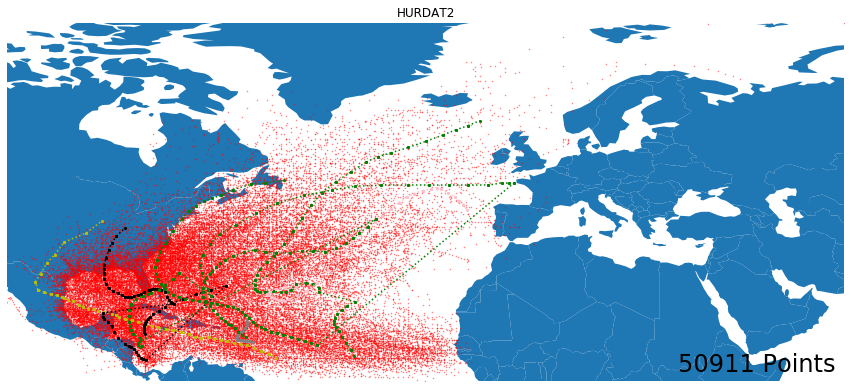

In [94]:
from matplotlib import pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
df = pd.read_csv('hur.csv', header=0, delimiter=',' ,parse_dates=['date_time'])
gdf = gpd.GeoDataFrame(df, geometry=[Point(xy) for xy in zip(df['Longitude'], df['Latitude'])])  
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(15, 12))
ax = gdf.plot(ax=ax, marker='.',alpha=0.5, markersize=1, color='red')
ax.set_xlim([df.Longitude.min(),df.Longitude.max()])
ax.set_ylim([df.Latitude.min(),df.Latitude.max()])
ax.text(45,8,str(gdf.shape[0])+' Points',ha='center', va='bottom', rotation=0,color='Black',fontsize=24)
ax.set_axis_off()
plt.title("HURDAT2")



def plot_hurr(name,cc):
    GILBERT=gdf.loc[gdf.Name==name,:]
    for i in range(GILBERT.shape[0]-2):
        plt.plot(GILBERT.iloc[i:i+2,:].geometry.x,GILBERT.iloc[i:i+2,:].geometry.y, 
                 'yo:',marker='.',color=cc, markersize=4,)

plot_hurr("OSCAR",'g')
plot_hurr("GILBERT",'y')
plot_hurr("LOIS",'pink')
plot_hurr("HELENA",'gray')
plot_hurr("KATRINA",'black')
plot_hurr("FLOYD",'g')

plt.savefig('plt.png')

plt.show()
